In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Image Label : 5


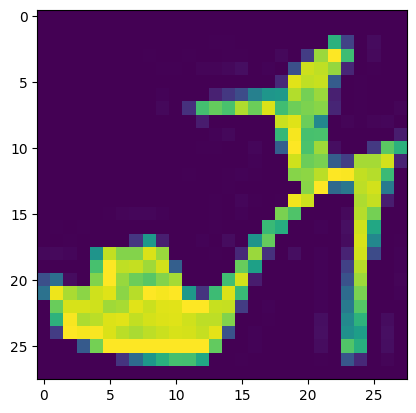

In [3]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :", ytrain[imgIndex])
plt.imshow(image)


In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


C:\Users\akhil\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [7]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)
classes = np.argmax(predictions, axis=1)
print(classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.9705588e-14 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.6119156e-18
  0.0000000e+00 9.8491943e-01 0.0000000e+00 0.0000000e+00 1.5080559e-02]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.8152583e-15
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[6 6 9 6 6]


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6779 - loss: 0.9961 - val_accuracy: 0.8336 - val_loss: 0.4964
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8255 - loss: 0.4987 - val_accuracy: 0.8428 - val_loss: 0.4533
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8445 - loss: 0.4477 - val_accuracy: 0.8598 - val_loss: 0.4107
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8517 - loss: 0.4216 - val_accuracy: 0.8650 - val_loss: 0.3944
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8593 - loss: 0.3973 - val_accuracy: 0.8640 - val_loss: 0.3957
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8667 - loss: 0.3766 - val_accuracy: 0.8706 - val_loss: 0.3743
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8724 - loss: 0.3611 - val_accuracy: 0.8728 - val_loss: 0.3617
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8743 - loss: 0.3590 - 

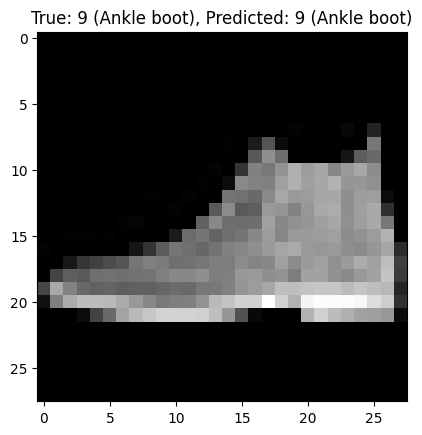

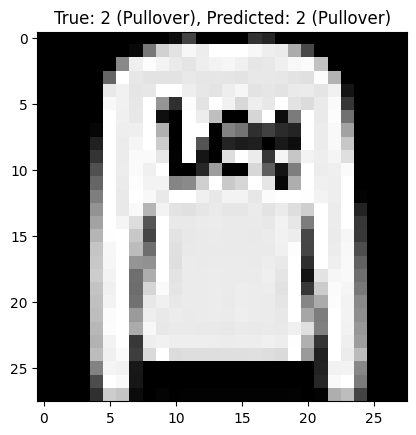

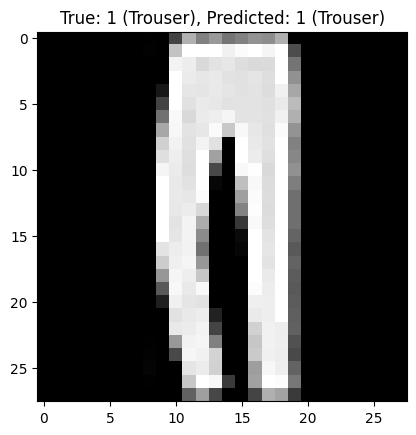

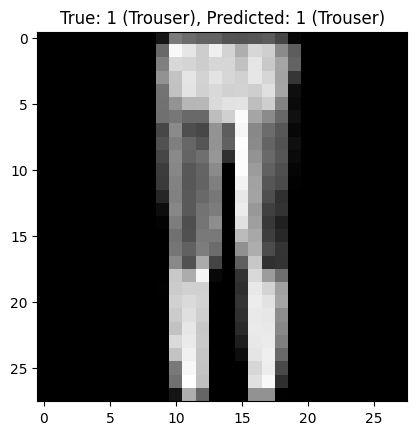

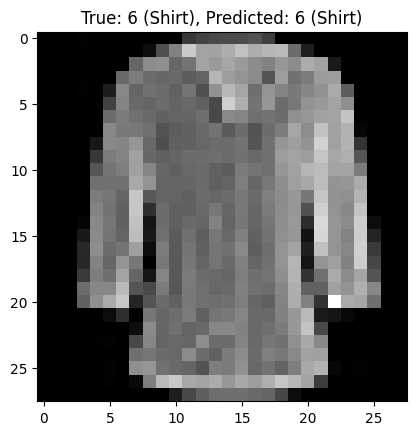

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

# Normalize the data (scale the pixel values to be between 0 and 1)
xtrain = xtrain / 255.0
xtest = xtest / 255.0

# Split the training data into training and validation sets
xvalid, xtrain = xtrain[:5000], xtrain[5000:]
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

# Define the class names corresponding to the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define the model
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Train the model with validation data
history = model.fit(xtrain, ytrain, epochs=10, 
                    validation_data=(xvalid, yvalid))

# Make predictions on the first 5 test images
new = xtest[:5]
predictions = model.predict(new)

# Get the class predictions
classes = np.argmax(predictions, axis=1)

# Print both the numeric labels and the class names for true and predicted labels
for i in range(5):
    true_label_num = ytest[i]  # Numeric true label
    predicted_label_num = classes[i]  # Numeric predicted label
    
    true_label_name = class_names[true_label_num]  # True class name
    predicted_label_name = class_names[predicted_label_num]  # Predicted class name
    
    print(f"Image {i+1}:")
    print(f"  True label: {true_label_num} ({true_label_name})")
    print(f"  Predicted label: {predicted_label_num} ({predicted_label_name})")
    print()  # For spacing

# Display the first 5 images with true and predicted labels
for i in range(5):
    plt.imshow(xtest[i], cmap="gray")
    plt.title(f"True: {ytest[i]} ({class_names[ytest[i]]}), Predicted: {classes[i]} ({class_names[classes[i]]})")
    plt.show()
